In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import PercentFormatter

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.rcParams.update({
    "font.family": "Times New Roman",  # Set font to Times New Roman
    # "font.size": 10,  # Adjust font size as needed
    # "axes.labelsize": 12,  # Axis labels
    # "xtick.labelsize": 10,  # X-axis tick labels
    # "ytick.labelsize": 10,  # Y-axis tick labels
    # "legend.fontsize": 10   # Legend text
})

In [2]:
DIRECTORY = "grid4x4"

all_files = glob.glob(os.path.join(DIRECTORY, '**', '*queue.csv'), recursive=True)
all_files.sort()
all_files = [filename.replace("\\", "/") for filename in all_files]


experiments = {}
experiments['colight'] = {}
experiments['dqn'] = {}
experiments['mplight'] = {}
experiments['fixedtime'] = {}
experiments['maxpressure'] = {}

for filename in all_files:
    model_name = filename.split("/")[1]
    experiment_name = filename.split("/")[-1].rstrip(".csv")
    df = pd.read_csv(filename)
    df = df[df["queueing_length"] > 0].groupby(['timestep']).agg({"queueing_length": "mean"}).round(2).reset_index()
    
    df['interval'] = (df['timestep'] // 3600).astype(int)

    # Group by the interval and calculate the mean queueing length
    result = df.groupby('interval')['queueing_length'].mean().reset_index()

    # Convert interval back to actual time in seconds for better understanding
    result['timestep'] = result['interval']
    
    result = result.drop(columns='interval')
    
    df = result
    
    experiments[model_name][experiment_name] = df


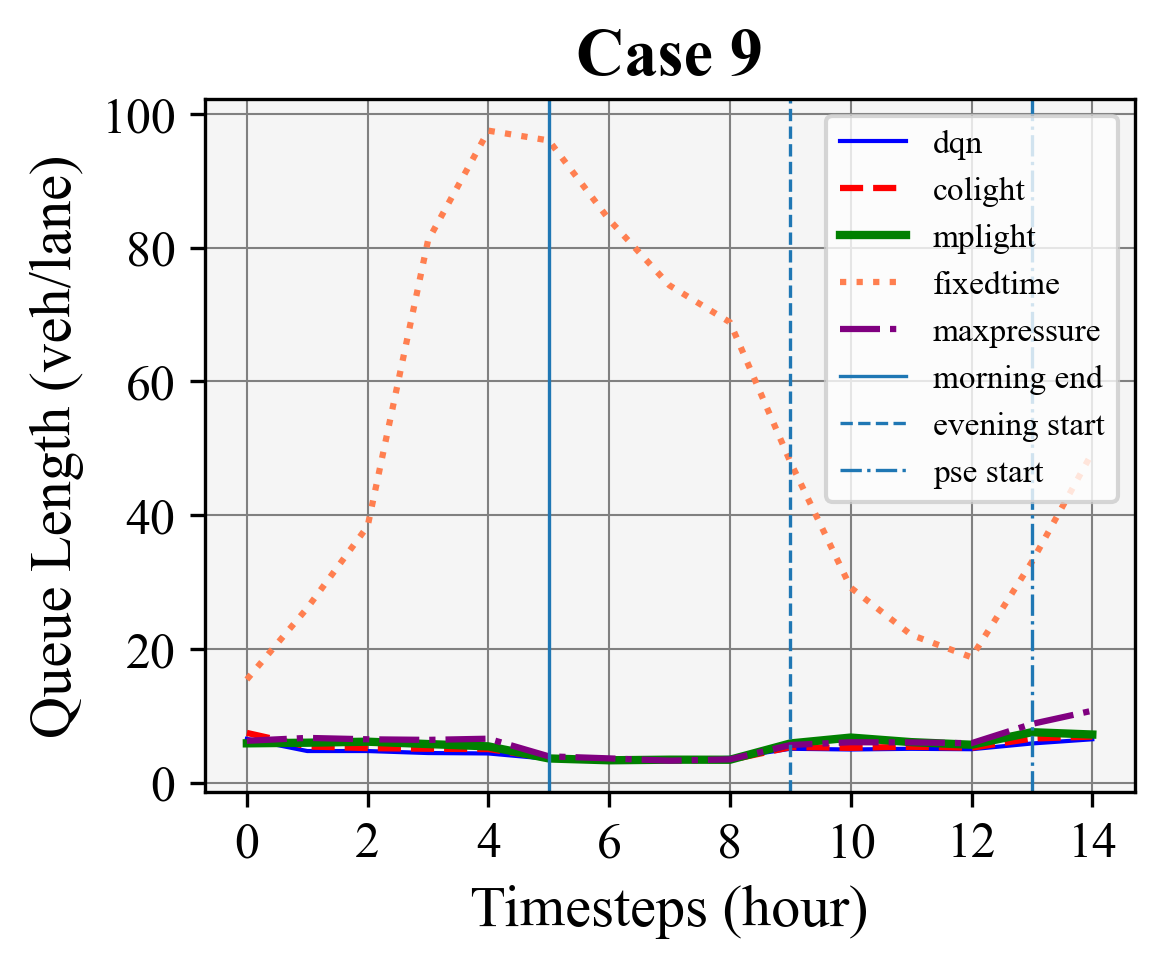

In [3]:
case_name = "combined_queue"
case_title = "Case 9"
# experiment_name = "combined_queue"

dqn_df = experiments['dqn'][case_name]
# dqn_df2 = experiments['colight']["combined_sensor_queue"]
colight_df = experiments['colight'][case_name]
mplight_df = experiments['mplight'][case_name]
fixedtime_df = experiments['fixedtime'][case_name]
max_df = experiments['maxpressure'][case_name]

plt.figure(figsize=(4, 3))
plt.plot(dqn_df["timestep"], dqn_df["queueing_length"], label='dqn', color='blue', linestyle='-', linewidth=1.0)
# plt.plot(dqn_df2['timestep'], dqn_df2['queueing_length'], label='dqn sensor', color='red', linestyle='--', linewidth=2.5)
plt.plot(colight_df['timestep'], colight_df['queueing_length'], label='colight', color='red', linestyle='--', linewidth=1.5)
plt.plot(mplight_df['timestep'], mplight_df['queueing_length'], label='mplight', color='green', linestyle='-', linewidth=2.0)
plt.plot(fixedtime_df["timestep"], fixedtime_df["queueing_length"], label='fixedtime', color='coral', linestyle=':', linewidth=1.5)
plt.plot(max_df["timestep"], max_df["queueing_length"], label='maxpressure', color='purple', linestyle='-.', linewidth=1.5)
plt.axvline(x=5, label='morning end', linestyle='-', linewidth=0.8)
plt.axvline(x=9, label='evening start', linestyle='--', linewidth=0.8)
plt.axvline(x=13, label='pse start' ,linestyle='-.', linewidth=0.8)

plt.title(case_title, fontweight='bold', fontsize=16)
plt.xlabel("Timesteps (hour)", fontsize=14)
plt.ylabel('Queue Length (veh/lane)', fontsize=14)
plt.legend(loc='upper right', fontsize=8)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(range(0,15,1*2), fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('whitesmoke')

plt.savefig('case\grid4x4\case9.pdf', bbox_inches='tight')
plt.show()

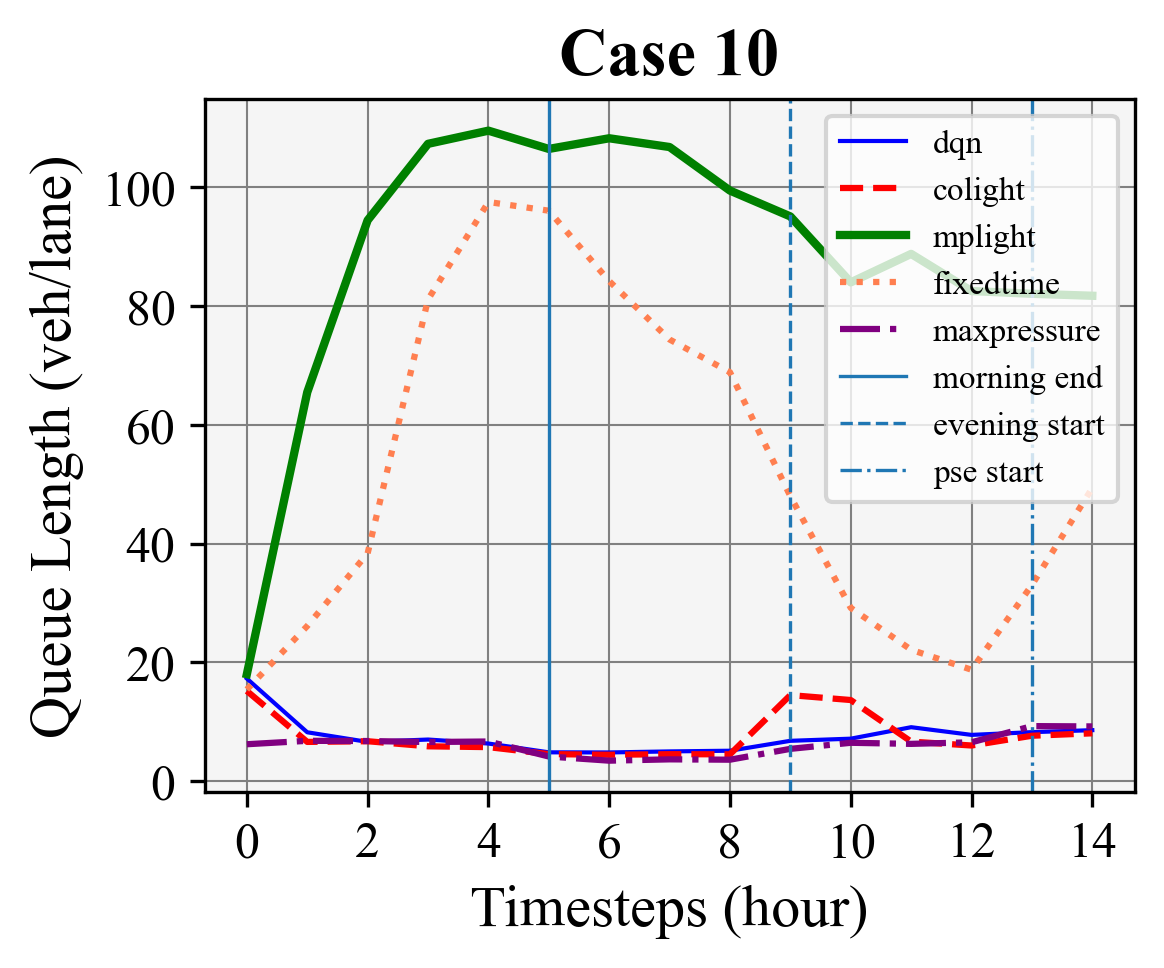

In [4]:
case_name = "combined_sensor_queue"
case_title = "Case 10"

dqn_df = experiments['dqn'][case_name]
colight_df = experiments['colight'][case_name]
mplight_df = experiments['mplight'][case_name]
fixedtime_df = experiments['fixedtime']["combined_queue"]
max_df = experiments['maxpressure'][case_name]

plt.figure(figsize=(4, 3))
plt.plot(dqn_df["timestep"], dqn_df["queueing_length"], label='dqn', color='blue', linestyle='-', linewidth=1.0)
# plt.plot(dqn_df2['timestep'], dqn_df2['queueing_length'], label='dqn sensor', color='red', linestyle='--', linewidth=2.5)
plt.plot(colight_df['timestep'], colight_df['queueing_length'], label='colight', color='red', linestyle='--', linewidth=1.5)
plt.plot(mplight_df['timestep'], mplight_df['queueing_length'], label='mplight', color='green', linestyle='-', linewidth=2.0)
plt.plot(fixedtime_df["timestep"], fixedtime_df["queueing_length"], label='fixedtime', color='coral', linestyle=':', linewidth=1.5)
plt.plot(max_df["timestep"], max_df["queueing_length"], label='maxpressure', color='purple', linestyle='-.', linewidth=1.5)
plt.axvline(x=5, label='morning end', linestyle='-', linewidth=0.8)
plt.axvline(x=9, label='evening start', linestyle='--', linewidth=0.8)
plt.axvline(x=13, label='pse start' ,linestyle='-.', linewidth=0.8)

plt.title(case_title, fontweight='bold', fontsize=16)
plt.xlabel("Timesteps (hour)", fontsize=14)
plt.ylabel('Queue Length (veh/lane)', fontsize=14)
plt.legend(loc='upper right', fontsize=8)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(range(0,15,1*2), fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('whitesmoke')

plt.savefig('case\grid4x4\case10.pdf', bbox_inches='tight')

plt.show()

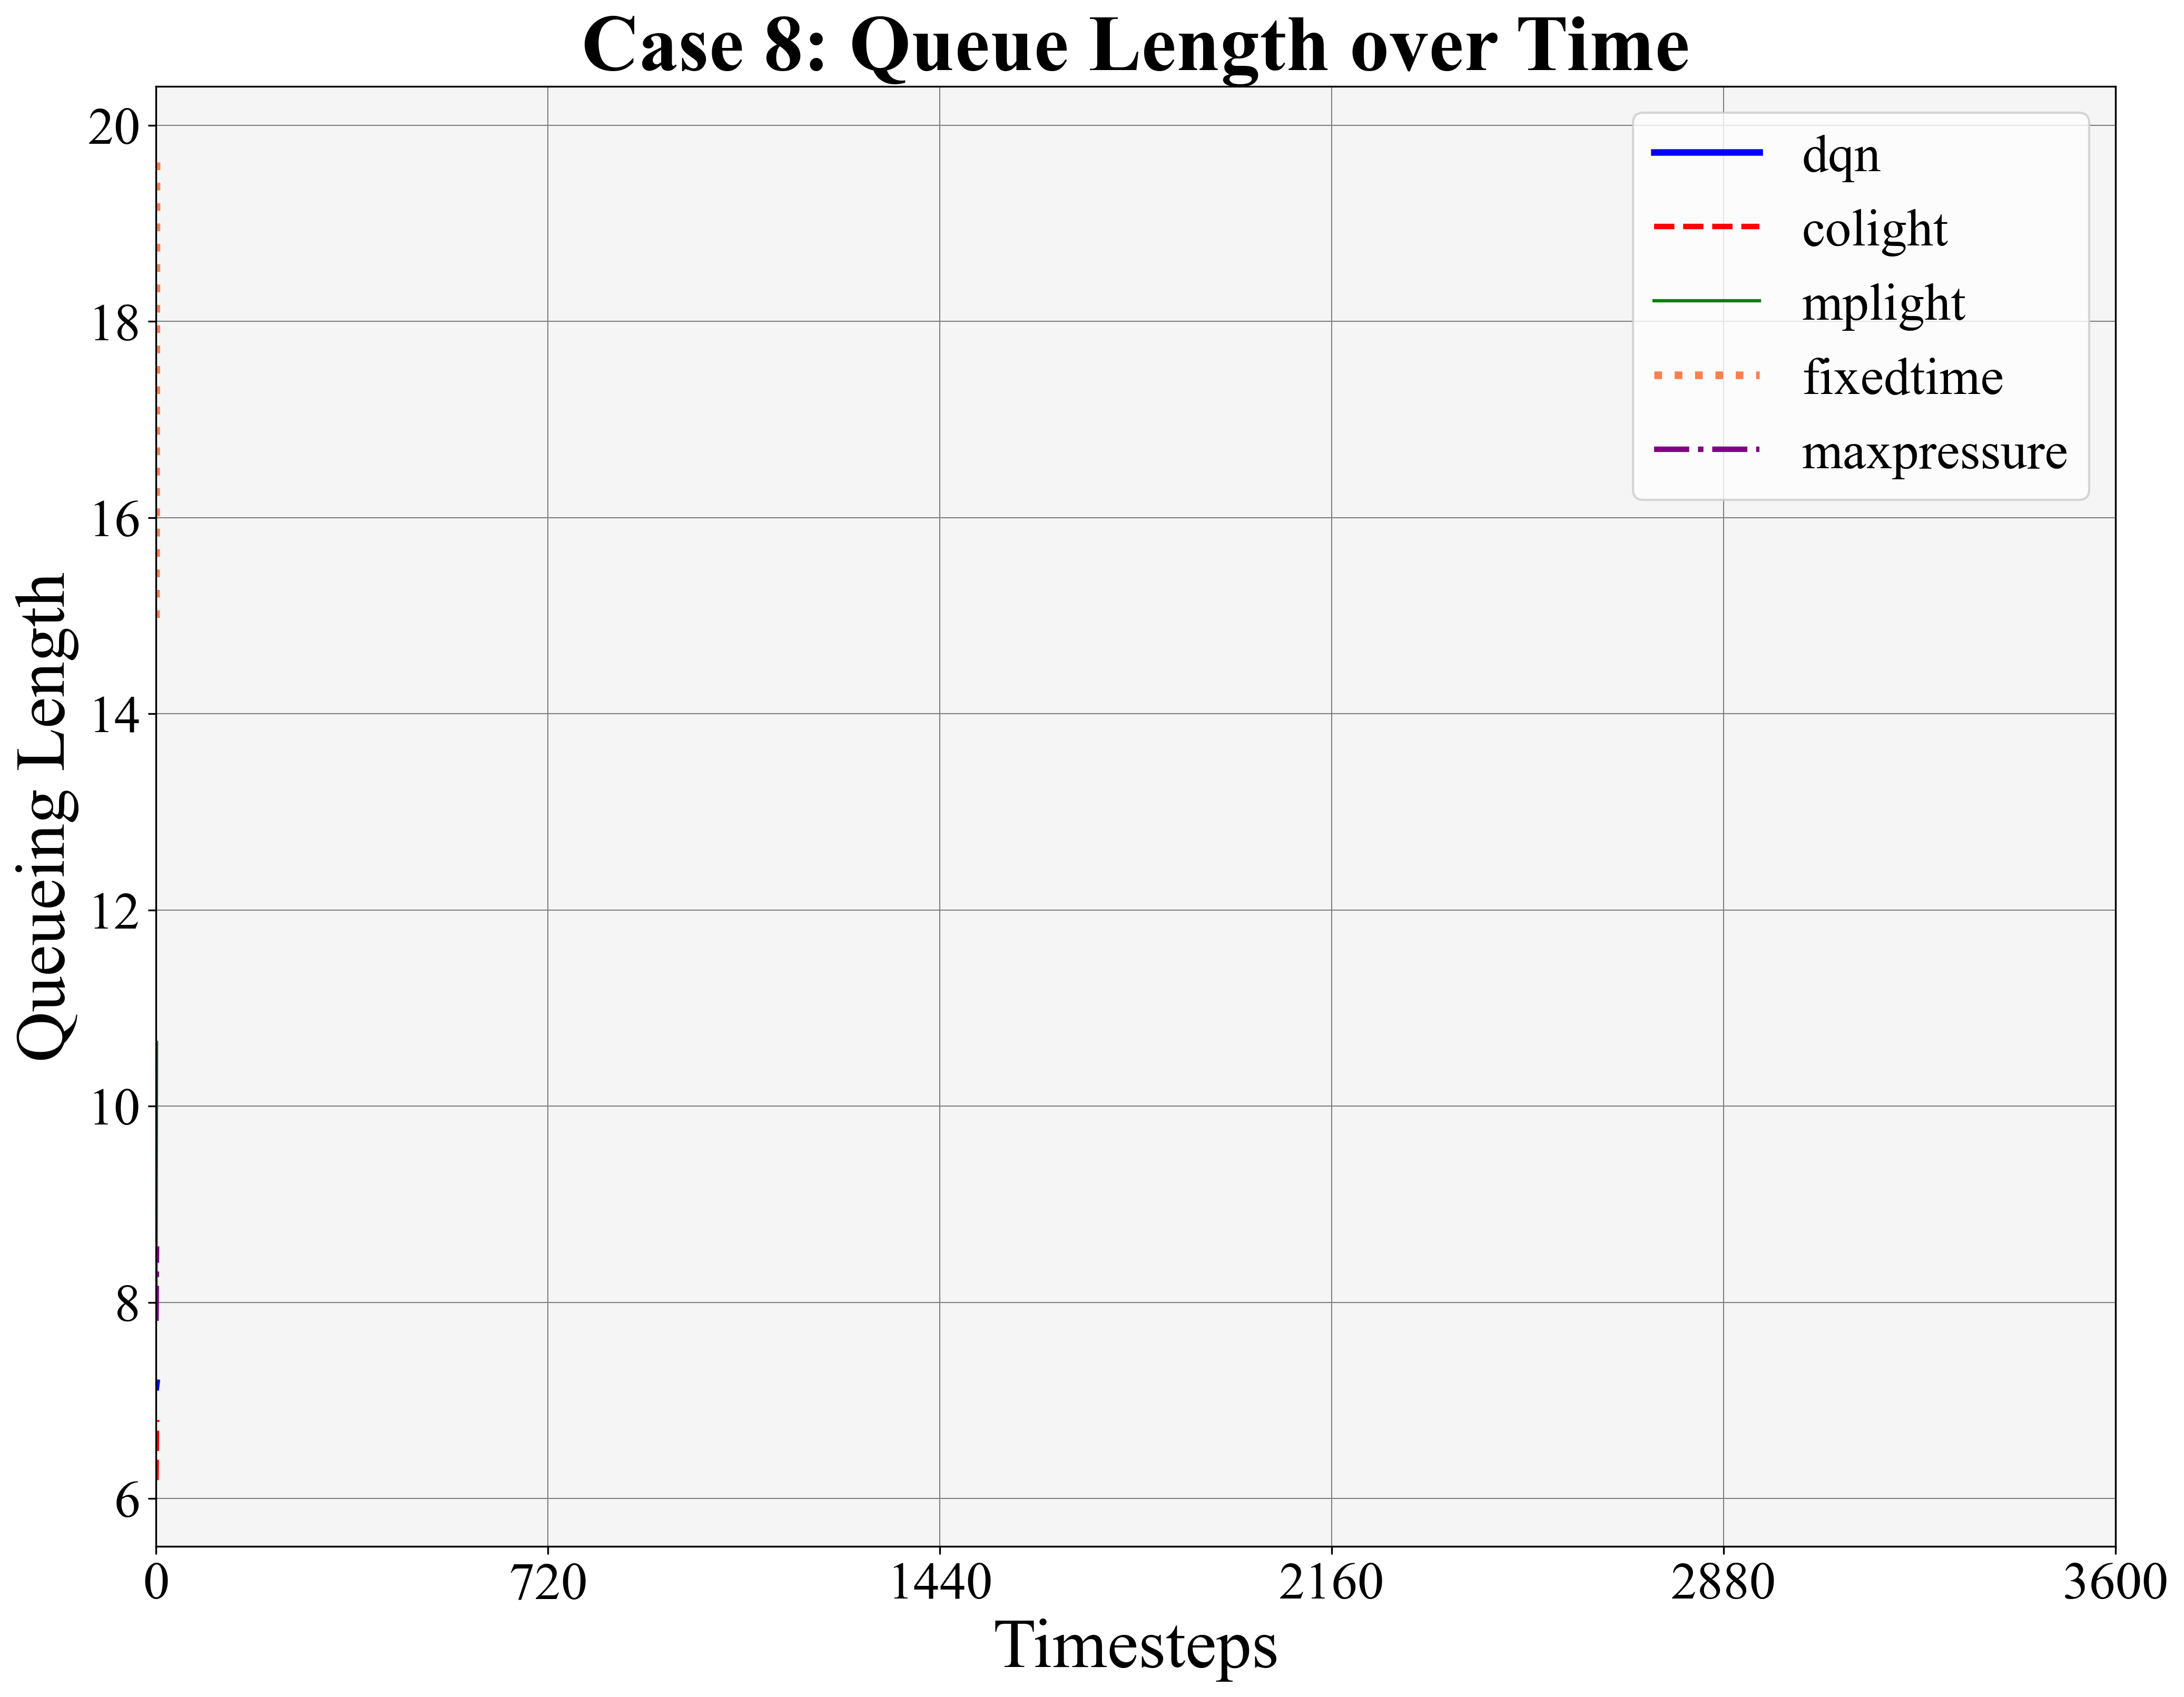

In [5]:
case_name = "morning_1_sensor_queue"
case_title = "Case 8: Queue Length over Time"

dqn_df = experiments['dqn'][case_name]
colight_df = experiments['colight'][case_name]
mplight_df = experiments['mplight'][case_name]
fixedtime_df = experiments['fixedtime']["morning_1_queue"]
max_df = experiments['maxpressure'][case_name]

plt.figure(figsize=(16, 12))
plt.plot(dqn_df["timestep"], dqn_df["queueing_length"], label='dqn', color='blue', linestyle='-', linewidth=3)
plt.plot(colight_df['timestep'], colight_df['queueing_length'], label='colight', color='red', linestyle='--', linewidth=2.5)
plt.plot(mplight_df['timestep'], mplight_df['queueing_length'], label='mplight', color='green', linestyle='-', linewidth=1.5)
plt.plot(fixedtime_df["timestep"], fixedtime_df["queueing_length"], label='fixedtime', color='coral', linestyle=':', linewidth=3.5)
plt.plot(max_df["timestep"], max_df["queueing_length"], label='maxpressure', color='purple', linestyle='-.', linewidth=2.5)
# plt.axvline(x=18000, label='morning end', linestyle='-', linewidth=3.5)
# plt.axvline(x=32400, label='evening start', linestyle='--', linewidth=2.5)
# plt.axvline(x=46800, label='pse start' ,linestyle='-.', linewidth=1.5)

plt.title(case_title, fontweight='bold', fontsize=36)
plt.xlabel("Timesteps", fontsize=32)
plt.ylabel('Queueing Length', fontsize=32)
plt.legend(loc='upper right', fontsize=24)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(range(0,3601,360*2), fontsize=24)
plt.yticks(fontsize=24)
plt.gca().set_facecolor('whitesmoke')

plt.show()